## Lesson 8 : Convolution networks

### But FIRST - finish up Collaborative filtering!

I included notes on the rest of Chapter 8  in the previous lesson because I had no idea he was going to continue on in this lesson. 

For reference he goes over:

* Creating your own embedding layer

* Intepreting embeddings and biases 

* Using fastai's `collab_learner` implementation

* Embedding distances 

* Deep learning for collab filtering


### Embeddings for NLP (30:30)

* Discussion of how embeddings are used words, which are just a large categorical variable (the vocab)

* The neural net only sees the embeddings, which it learns.


### Embeddings for Tabular

* As mentioned (i think?) before we can also turn any categorical into an embedding, for example those that often appear in tabular data. 

* This is done in chapter 9 in the book.

* Guo, Cheng, and Felix Berkhahn. 2016. “Entity Embeddings of Categorical Variables.” arXiv. https://doi.org/10.48550/arXiv.1604.06737.

* Guo et. al. also combined deep learning embeddings with boosted trees (i.e. also feeding the embeddings into decision tree)


### CNNS

Video at 44:30

* Based partly on Chapter 13 in the book.


#### Convolutions and pooling
* First he presents convolutions in excel.  Mentions that MaxPooling is not as common and modern visual learners use stride > 1 (typically 2?) and average pooling at the end. 

* Fastai uses "Concat pooling" and concatenates the average and max pooling layers at the end.

* Points out that a convolution layer is really just a matrix multiplication: 
   * Flatten the input into a vector
   * Now the convolution can be written as a matrix multiplying the vector, except that the is constrained: Many of the weights are zero, and the rest are shared.
   * This is shown in Chapter 13 of the book.


####  Dropout layers

* Shows how dropout works in excel, corrupting the activations randomly for each batch. 

* This is a regularization technique that helps prevent overfitting.

* The idea is that a human can look at the corrupted image and still see what it was, and a neural net should be able to as well. This forces the model to the learn the representation and not just memorize the data (overfitting).


#### Activation functions

* Pretty much any nonlinearity can be used as an activation function.

* ReLU is the most common these days as it is fast, but others are commonly used as well.. tanh, sigmoid, etc.



## WHAT NOW? 

*  Write - Code, papers, blog posts, etc.

* Help - Forums, StackOverflow, etc.

* Gather - Book clubs, meetups, study groups

* Build - Apps, Work Projects, Libraries

* Go on to part too!

### Chapter 13

* The book and the lecutre overlap quite a bit in concept.

* The book however also gives some pytorch examples of setting up a CNN for MNIST

* Although I have done this before, I think I will reproduce it here:

In [3]:
import torch 
import torch.nn as nn
import torch.functional as F




In [15]:
# import MNIST dataset
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_path = './data'
mnist = datasets.MNIST(data_path, train=True, download=True, transform=transforms.ToTensor())

first image is a 1


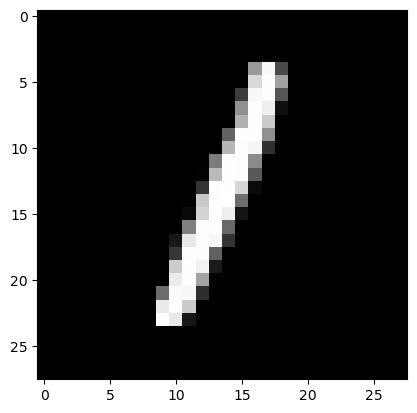

In [24]:
# load data
data_loader = DataLoader(mnist, batch_size=32, shuffle=True)

# pull in a sample image
data_iter = iter(data_loader)
images, labels = next(data_iter)
print(f"first image is a {labels[0]}")
# plot the fist image
import matplotlib.pyplot as plt
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

Ok lets build a simple model to classify MNIST digits using a CNN.

In [38]:
# Simple CNN using stride of 2 to downsample until we reach 1x1

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1)
        self.conv5 = nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1)
        self.fc = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))
        #print(x.shape)
        x = x.view(-1, 128)
        
        x = self.fc(x)
        return x

In [40]:
# simple training loop
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    for i, (images, labels) in enumerate(data_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f"epoch {epoch}, step {i}, loss {loss.item()}")

epoch 0, step 0, loss 2.2970962524414062
epoch 0, step 100, loss 0.529944658279419
epoch 0, step 200, loss 0.21718564629554749
epoch 0, step 300, loss 0.2556946575641632
epoch 0, step 400, loss 0.21101044118404388
epoch 0, step 500, loss 0.12730374932289124
epoch 0, step 600, loss 0.14507035911083221
epoch 0, step 700, loss 0.22321510314941406
epoch 0, step 800, loss 0.03843311965465546
epoch 0, step 900, loss 0.2069709599018097
epoch 0, step 1000, loss 0.16211853921413422
epoch 0, step 1100, loss 0.027688318863511086
epoch 0, step 1200, loss 0.015369717963039875
epoch 0, step 1300, loss 0.03924035653471947
epoch 0, step 1400, loss 0.2293858379125595
epoch 0, step 1500, loss 0.07648778706789017
epoch 0, step 1600, loss 0.04399525746703148
epoch 0, step 1700, loss 0.007497603073716164
epoch 0, step 1800, loss 0.006861202884465456
epoch 1, step 0, loss 0.02264256961643696
epoch 1, step 100, loss 0.04764539375901222
epoch 1, step 200, loss 0.01589866355061531
epoch 1, step 300, loss 0.070

In [42]:
# load test data
mnist_test = datasets.MNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

In [49]:
test_loader = DataLoader(mnist_test, batch_size=32)
correct = sum((torch.argmax(model(images), dim=1) == labels).sum().item() 
              for images, labels in test_loader)
total = len(mnist_test)

In [48]:
print(f"accuracy: {correct / total}")

accuracy: 0.9849
